### EDA on Kentucky, Louisville
* From 2015-01-01 to 2018-01-28

* This is an analysis on the police driver cases in Louisville, Kentucky between the years 2015 and 2018, as collected from the Stanford Open Policing Project.
* The dataset was downloaded from [Stanford Open Policing](https://openpolicing.stanford.edu/data/) and no prior filtering was performed before importing it into this project

In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
#Import the dataset
ky = pd.read_csv('ky_louisville_2020_04_01.csv')
ky.shape

(110960, 32)

In [188]:
#Brief view of the dataset
ky.head()

,raw_row_number,date,time,location,lat,lng,beat,division,subject_age,subject_race,...,raw_activity_division,raw_division,raw_activity_beat,raw_beat,raw_driver_race,raw_persons_race,raw_persons_ethnicity,raw_driver_age_range,raw_was_vehcile_searched,raw_citation_location
0,35121,2015-01-01,22:39:00,PRESTON HWY/LINWOOD AVE,38.210850,-85.740058,BEAT 1,6TH DIVISION,53.0,white,...,-TH DIVISION,NaN,BEAT -,NaN,WHITE,W,N,-- - --,NO,LINWOOD AVE / PRESTON HWY
1,35213,2015-01-02,16:42:00,BARDSTOWN RD/GLENWORTH,38.203829,-85.665319,BEAT 5,6TH DIVISION,NaN,white,...,-TH DIVISION,NaN,BEAT -,NaN,WHITE,NaN,NaN,-- - --,NO,NaN
2,2363,2015-01-02,20:00:00,HIKES LN/GOLDSMITH LN,38.205311,-85.650115,BEAT 5,6TH DIVISION,NaN,black,...,-TH DIVISION,NaN,BEAT -,NaN,BLACK,NaN,NaN,-- - --,NO,NaN
3,35122|35123|35124|35125,2015-01-02,20:35:00,DOWNING WAY/HIKES LN,38.202592,-85.654212,BEAT 5,6TH DIVISION,24.0,black,...,-TH DIVISION,-,BEAT -,-,BLACK,B,N,-- - --,YES,DOWNING WAY / HIKES LN
4,35126|35127,2015-01-11,17:20:00,PRESTON HWY/FERN VALLEY RD,38.156730,-85.696997,BEAT 2,6TH DIVISION,24.0,black,...,-TH DIVISION,-,BEAT -,-,BLACK,B,N,-- - --,NO,FERN VALLEY RD / PRESTON HWY


In [189]:
#Extract the necessary columns for the analysis
ky = ky[['date', 'time', 'location', 'beat', 'division', 'subject_age', 'subject_race', 'subject_sex',\
         'officer_race', 'officer_sex', 'violation', 'citation_issued', 'warning_issued', 'outcome',\
         'frisk_performed', 'search_conducted']]

#Merge the date and time columns into a single date_time column and drop them
ky['date_time'] = pd.to_datetime(ky.date.str.cat(ky.time, sep=' '))
ky.drop(['date', 'time'], axis='columns', inplace=True)

#Fill the Nan's in the subject_age column with its mean
ky.subject_age.fillna(ky.subject_age.mean(), inplace=True)

#Assign the unknown races as other
ky.subject_race.replace('unknown','other', inplace=True)

#Rename the divisions
ky.division.replace(['1', '3', '4', '5', '6', '7', '8'], ['1ST DIVISION', '3RD DIVISION', '4TH DIVISION', '5TH DIVISION', '6TH DIVISION', '7TH DIVISION', '8TH DIVISION'], inplace=True)

#Drop Nan's in relation to the subject_sex and outcome columns
ky.dropna(subset=['officer_sex', 'division', 'location', 'violation', 'beat', 'date_time', 'subject_race', 'subject_sex'], inplace=True)

#Specify the desired datatypes for each column
ky = ky.astype({'location':'category', 'beat':'category', 'division':'category', 'subject_age':'int64',\
                'subject_race':'category', 'subject_sex':'category', 'officer_race':'category',\
                'officer_sex':'category', 'violation':'category', 'citation_issued':bool, 'warning_issued':bool,\
                'outcome':'category', 'frisk_performed':bool, 'search_conducted':bool})

In [190]:
#Extract the hour, day_name, month_name and year from the date_time column and assign their individual columns
ky['year'] = ky.date_time.dt.year.astype('category')
ky['month'] = ky.date_time.dt.month_name().astype('category').cat.reorder_categories(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
ky['day'] = ky.date_time.dt.day_name().astype('category').cat.reorder_categories(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
ky['hour'] = ky.date_time.dt.hour.astype('category')

#Set date_time as index
ky.set_index('date_time', inplace=True)

In [191]:
#Check for other existing Nan's
ky.isna().sum()

location            0
beat                0
division            0
subject_age         0
subject_race        0
subject_sex         0
officer_race        0
officer_sex         0
violation           0
citation_issued     0
warning_issued      0
outcome             0
frisk_performed     0
search_conducted    0
year                0
month               0
day                 0
hour                0
dtype: int64

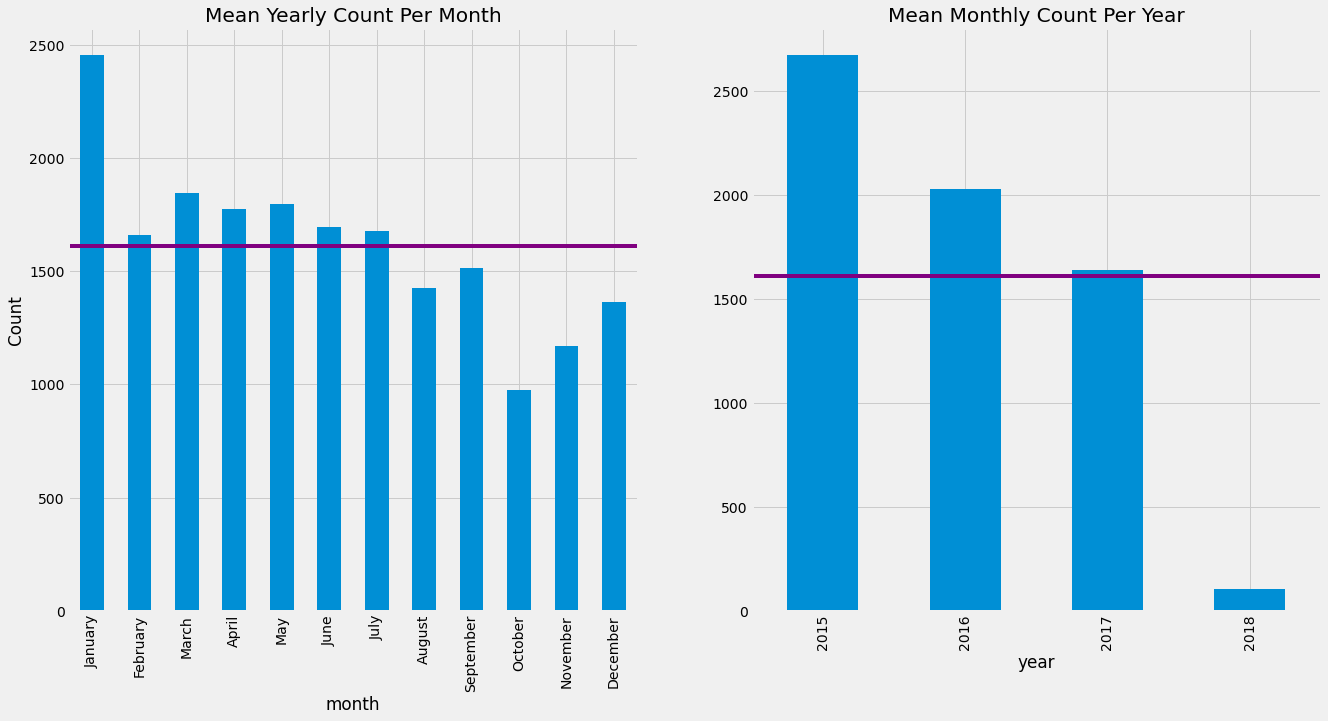

In [192]:
#Set plot style
plt.style.use('fivethirtyeight')

#Create the figure and axes
fig,ax = plt.subplots(1,2)

#Set the figure size
fig.set_size_inches([20,10])

#Create a crosstable with index ky.year and columns from ky.month and plot
cross_t_year = pd.crosstab(index=ky.year, columns=ky.month)

#Plot the mean yearly count for each year, with a line for its general mean
cross_t_year.mean().plot(kind='bar', ax=ax[0])
ax[0].axline(xy1=(0,cross_t_year.mean().mean()), slope=0, color='purple')

#Plot the mean monthly count for each month, with a line for its general mean
cross_t_year.mean(axis='columns').plot(kind='bar', ax=ax[1])
ax[1].axline(xy1=(0,cross_t_year.mean(axis='columns').mean()), slope=0, color='purple')

#Create the titles
ax[0].set_title('Mean Yearly Count Per Month')
ax[1].set_title('Mean Monthly Count Per Year')

#Create y_label
ax[0].set_ylabel('Count')

#Show the plot
plt.show()

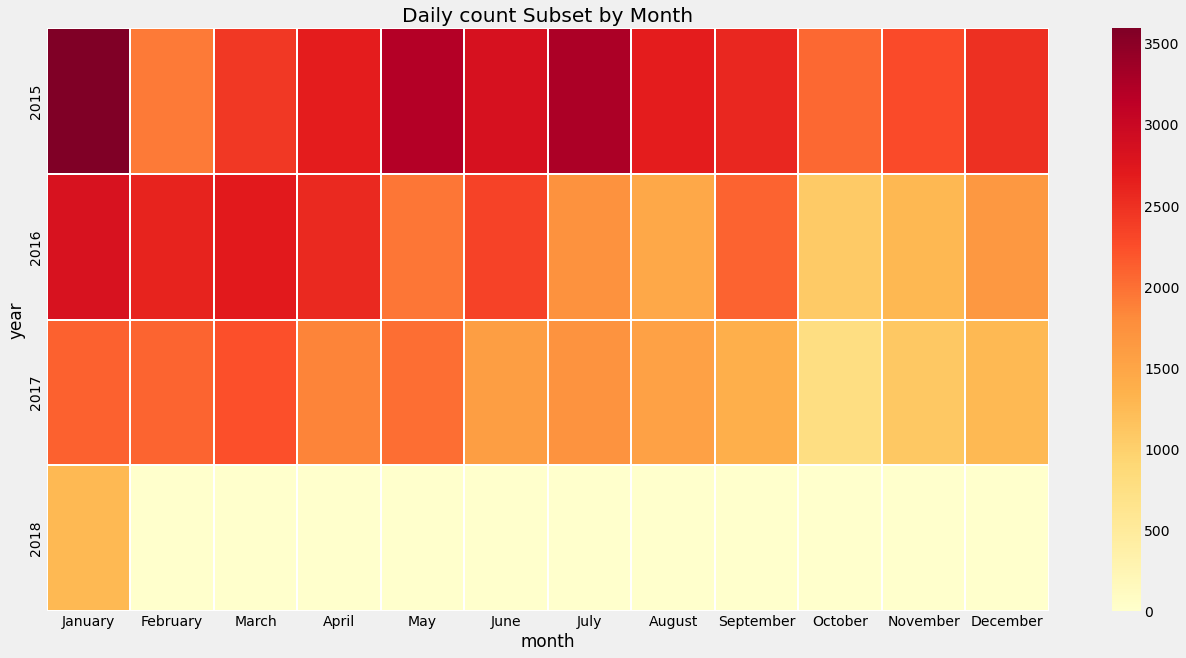

In [193]:
#Create the figure and axes
fig,ax = plt.subplots()

#Set the figure size
fig.set_size_inches([20,10])

#Create heatmap using cross_t_year
sns.heatmap(cross_t_year, cmap='YlOrRd', linewidth=0.01, linecolor='w')

#Create a title
plt.title('Daily count Subset by Month')

#Show the plot
plt.show()

**Observations:**
- 2018 has an unusually small mean and 2015 has the largest in the bar plots.
- The first 7 months have counts larger than the general mean with january significantly higher than the rest.
- October has the smallest mean count.
- 2018's low number is seen to be due to the fact that only january has counts in the heatmap.

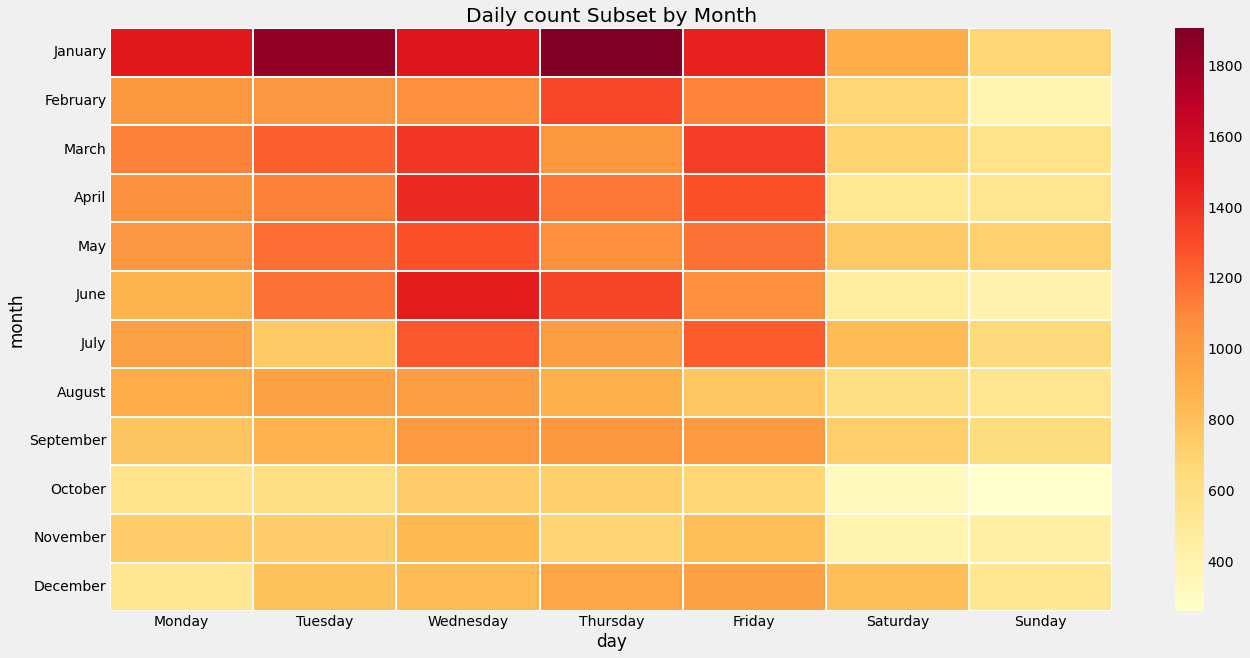

In [194]:
#Create the figure and axes
fig,ax = plt.subplots()

#Set the figure size
fig.set_size_inches([20,10])

#Create a crosstable with index ky.month and columns from ky.day
cross_t_month = pd.crosstab(index=ky.month, columns=ky.day)

#Create heatmap using cross_t_month
sns.heatmap(cross_t_month, cmap='YlOrRd', linewidth=0.01, linecolor='w')

#Create a title
plt.title('Daily count Subset by Month')

#Show the plot
plt.show()

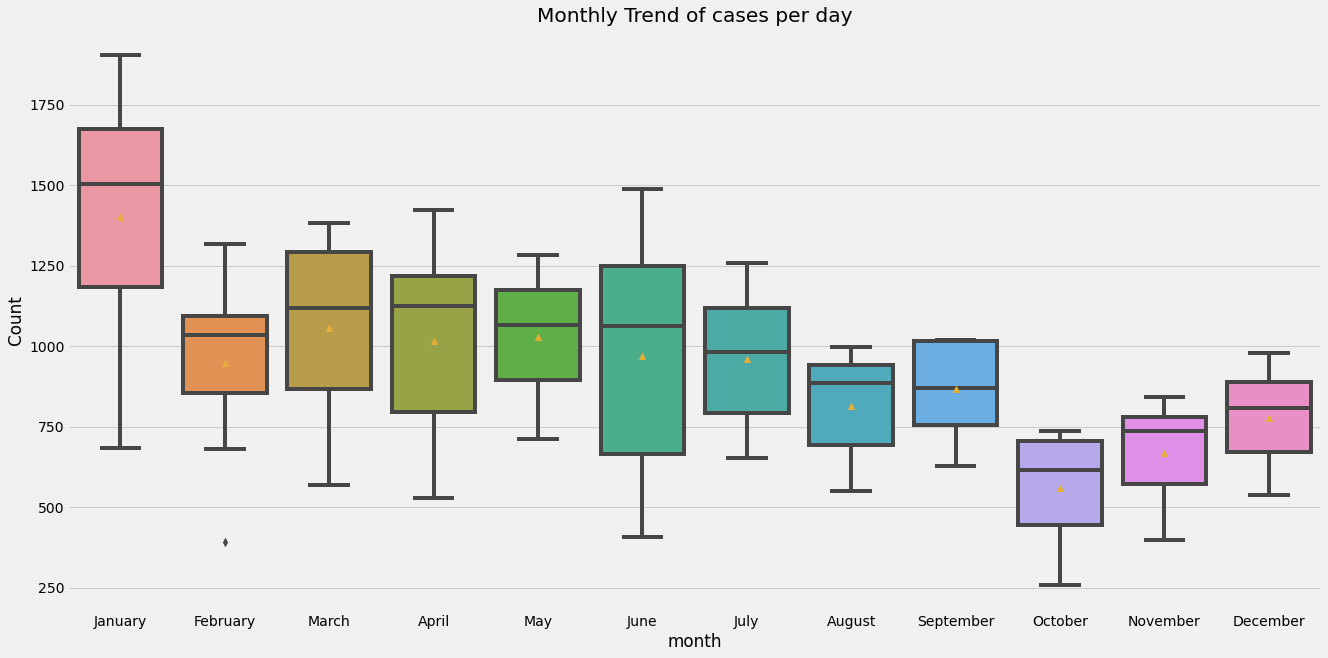

In [195]:
#Create the figure and axes
fig,ax = plt.subplots()

#Set the figure size
fig.set_size_inches([20,10])

#Convert the cross_tab to long format, rename the column and reset the index
y = pd.DataFrame(cross_t_month.stack()).rename(columns={0:'value'}).reset_index()

#Create a boxplot on the monthly trend of cases per day
sns.boxplot(x='month', y='value', data=y, showmeans=True)

#Create a title
plt.title('Monthly Trend of cases per day')

#Create y_label
plt.ylabel('Count')

#Show the plot
plt.show()

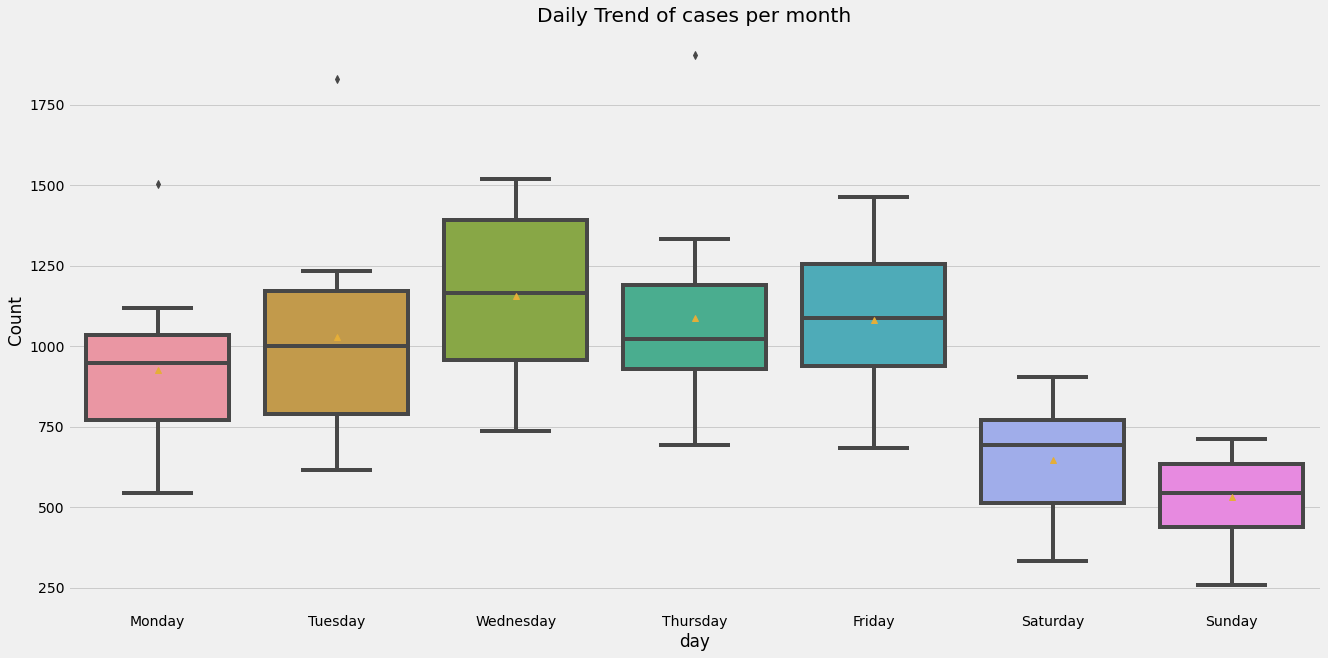

In [196]:
#Create the figure and axes
fig,ax = plt.subplots()

#Set the figure size
fig.set_size_inches([20,10])

#Create a boxplot on the daily trend of cases per month
sns.boxplot(x='day', y='value', data=y, showmeans=True)

#Create a title
plt.title('Daily Trend of cases per month')

#Create y_label
plt.ylabel('Count')

#Show the plot
plt.show()

**Observations:**
- January still has the highest count with a general reduction of count going from January to December.
- The monthly boxplot gives more detail to the data but shows that there is more variation the the counts between months.
- A curve can be seen in the between the dots representing the means of the weekly data in the boxplot, peaking on wednesday and gradually reducing till sunday.
- Saturday and Sunday have low counts.

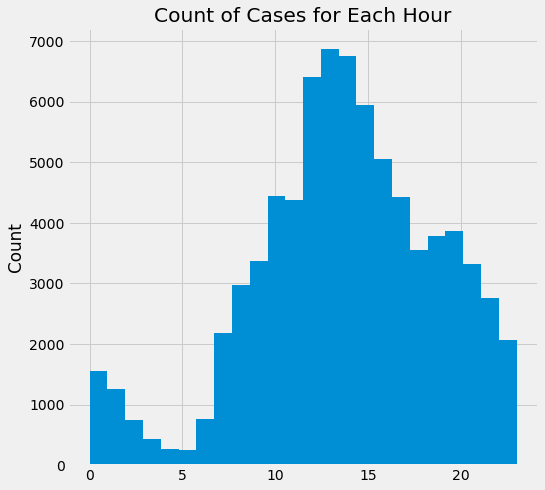

In [197]:
#Create the figure and axes
fig,ax = plt.subplots()

#Set the figure size
fig.set_size_inches([7.5,7.5])

#Plot a histogram on the count of cases for each hour
ky.hour.hist(bins=24, ax=ax)

#Create a title
plt.title('Count of Cases for Each Hour')

#Create y_label
plt.ylabel('Count')

#Show the plot
plt.show()

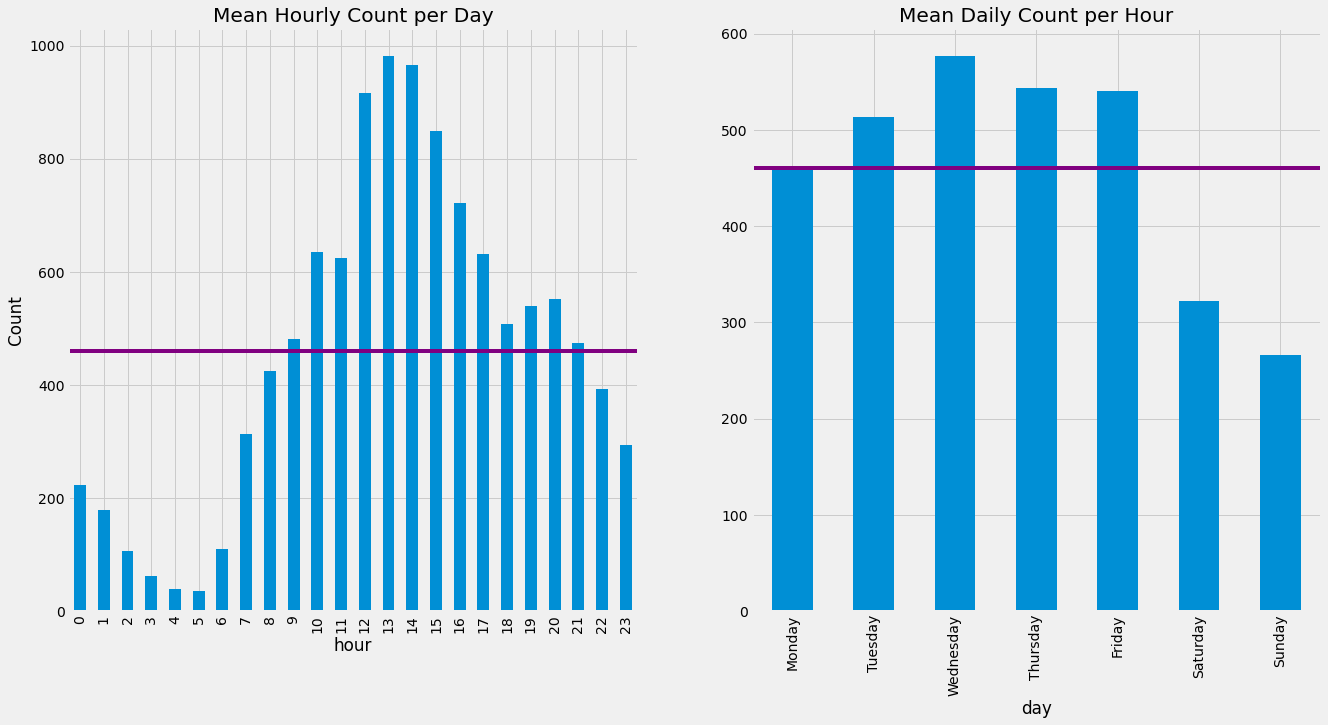

In [198]:
#Create the figure and axes
fig,ax = plt.subplots(1,2)

#Set the figure size
fig.set_size_inches([20,10])

#Create a crosstable with index ky.day and columns from ky.hour
cross_t_day = pd.crosstab(index=ky.day, columns=ky.hour)

#Plot the mean daily count for each hour, with a line for its general mean
cross_t_day.mean().plot(kind='bar', ax=ax[0])
ax[0].axline(xy1=(0,cross_t_day.mean().mean()), slope=0, color='purple')

#Plot the mean hourly count for each day, with a line for its general mean
cross_t_day.mean(axis='columns').plot(kind='bar', ax=ax[1])
ax[1].axline(xy1=(0,cross_t_day.mean(axis='columns').mean()), slope=0, color='purple')

#Create the titles
ax[0].set_title('Mean Hourly Count per Day')
ax[1].set_title('Mean Daily Count per Hour')

#Create y_label
ax[0].set_ylabel('Count')

#Show the plot
plt.show()

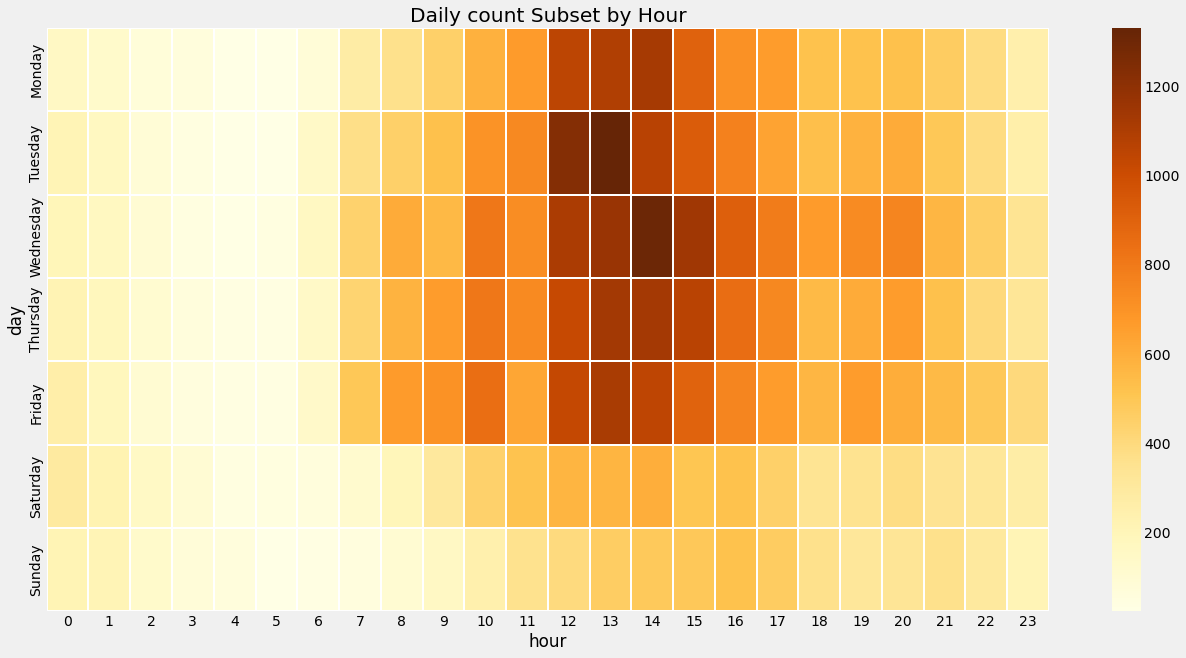

In [199]:
#Create the figure and axes
fig,ax = plt.subplots()

#Set the figure size
fig.set_size_inches([20,10])

#Create heatmap using cross_t_day
sns.heatmap(cross_t_day, cmap='YlOrBr', linewidth=0.01, linecolor='w')

#Create a title
plt.title('Daily count Subset by Hour')

#Create y_label
#plt.ylabel('Count')

#Show the plot
plt.show()

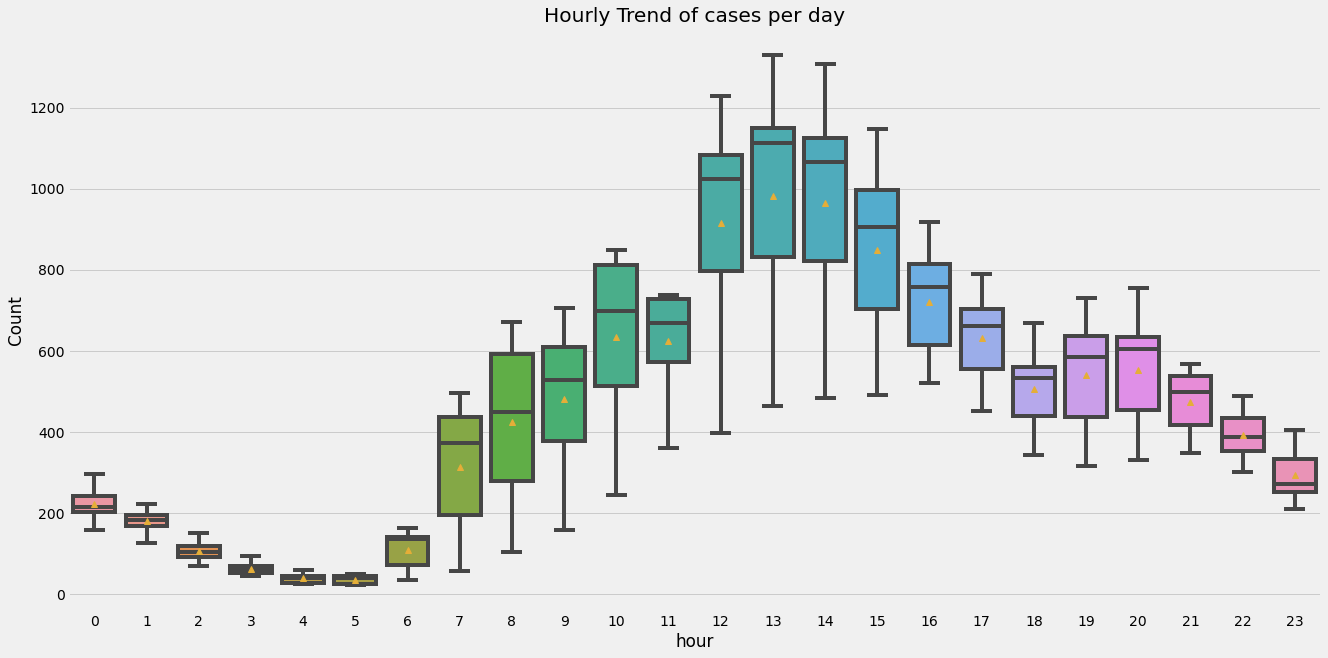

In [200]:
#Create the figure and axes
fig,ax = plt.subplots()

#Set the figure size
fig.set_size_inches([20,10])

#Convert the cross_tab to long format, rename the column and reset the index
x = pd.DataFrame(cross_t_day.stack()).rename(columns={0:'value'}).reset_index()

#Create a boxplot on the hourly trend of cases per day
sns.boxplot(x='hour', y='value', data=x, showmeans=True)

#Create a title
plt.title('Hourly Trend of cases per day')

#Create y_label
plt.ylabel('Count')

#Show the plot
plt.show()

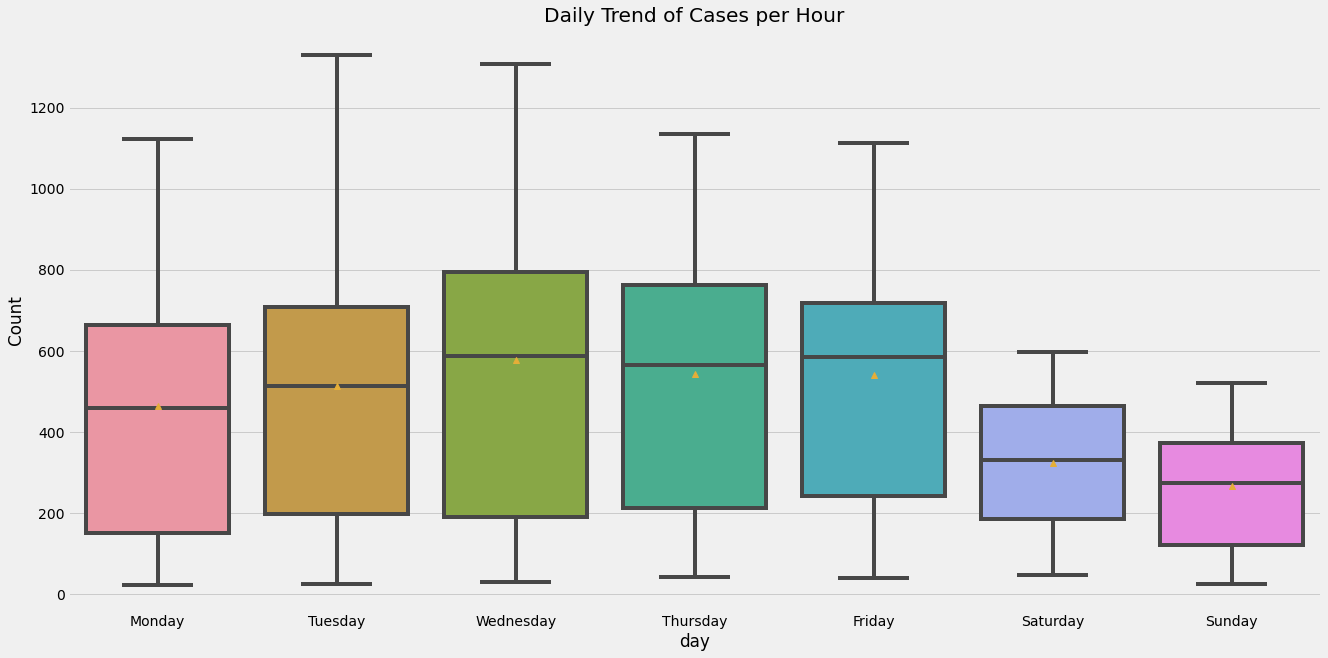

In [201]:
#Create the figure and axes
fig,ax = plt.subplots()

#Set the figure size
fig.set_size_inches([20,10])

#Create a boxplot on the daily trend of cases per hour
sns.boxplot(x='day', y='value', data=x, showmeans=True)

#Create a title
plt.title('Daily Trend of Cases per Hour')

#Create y_label
plt.ylabel('Count')

#Show the plot
plt.show()

**Observations:**
- The highest number of cases occur between the 12th and 15th hour of the day i.e. between 12pm and 3pm which is accurate to the time when people are most active.
- From 12pm to 5am i.e. the start of the day to  the 5th hour, there is very little count accounting to sleep time and a noticeable rise at 7pm when people have started their days.

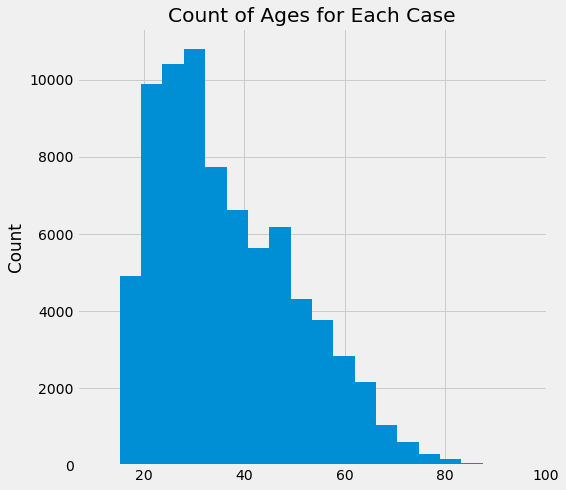

In [202]:
#Create the figure and axes
fig,ax = plt.subplots()

#Set the figure size
fig.set_size_inches([7.5,7.5])

#Plot a histogram on the count of cases for each hour
ky.subject_age.hist(bins=20, ax=ax)

#Create a title
plt.title('Count of Ages for Each Case')

#Create y_label
plt.ylabel('Count')

#Show the plot
plt.show()

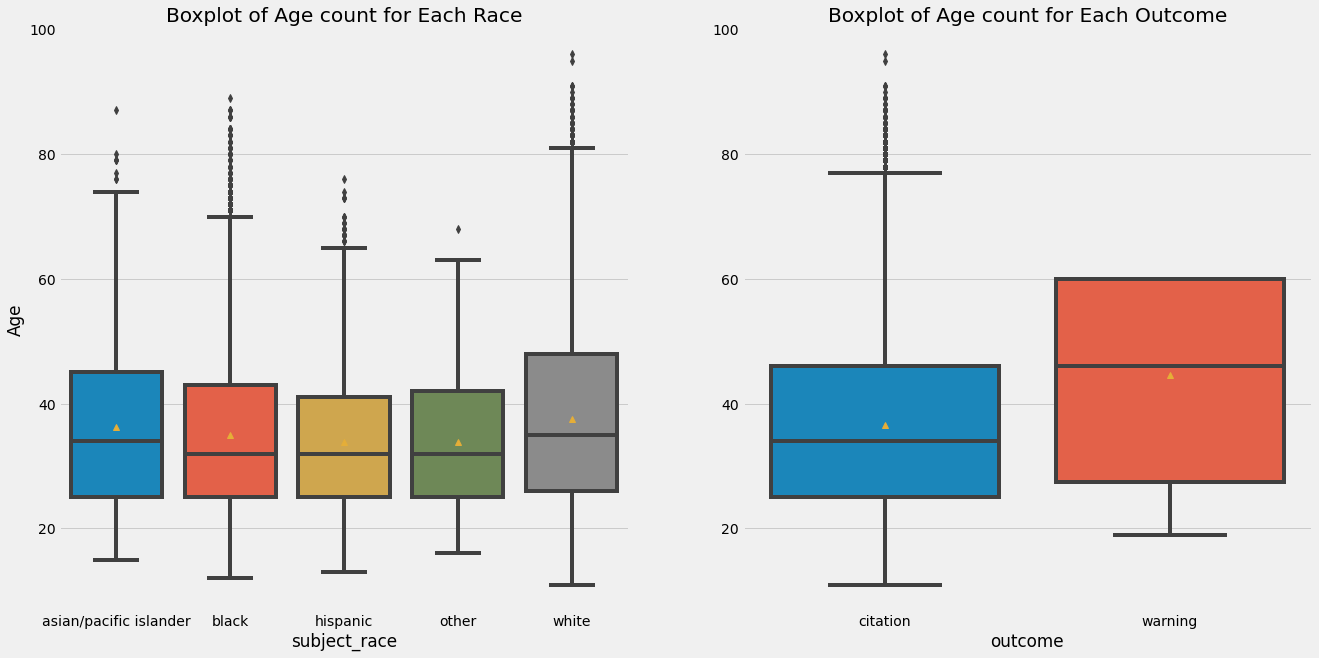

In [203]:
#Create the figure and axes
fig,ax = plt.subplots(1,2)

#Set the figure size
fig.set_size_inches([20,10])

#Create a crosstable with index ri.month and columns from ri.outcome and plot
sns.boxplot(x='outcome', y='subject_age', data=ky, showmeans=True, ax=ax[1])
sns.boxplot(x='subject_race', y='subject_age', data=ky, showmeans=True, ax=ax[0])

#Create titles
ax[0].set_title('Boxplot of Age count for Each Race')
ax[1].set_title('Boxplot of Age count for Each Outcome')

#Create y_label
ax[0].set_ylabel('Age')
ax[1].set_ylabel('')

#Show the plot
plt.show()

**Observations:**
- Most cases are associated with people between 20 and 40 years of age.
- From age 50, there is a constant drop in the case count down to age 90.
- There is no correlation between the race and age of cases as they both follow almost the same trend with exception with the white race.
- The black and white race have an unusual number of outliers.

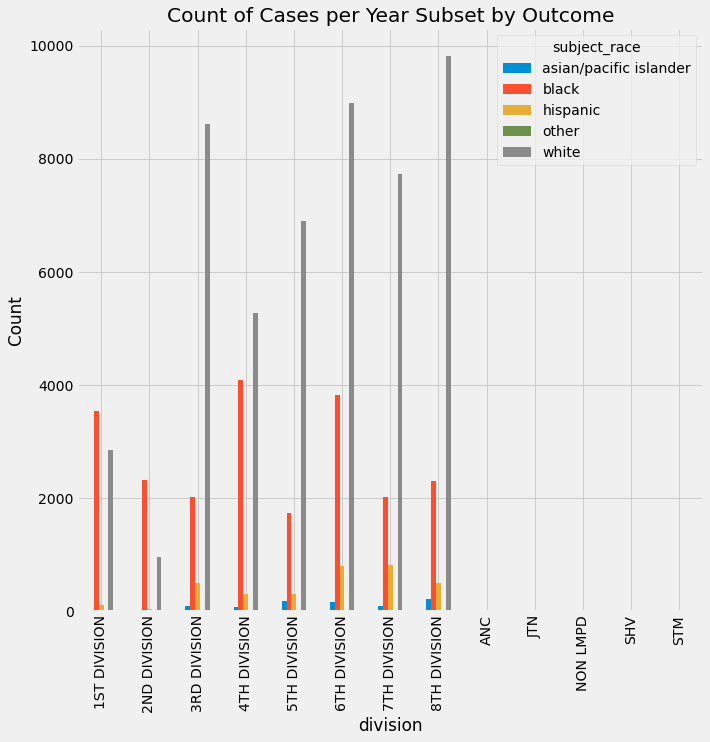

In [204]:
#Create the figure and axes
fig,ax = plt.subplots()

#Set the figure size
fig.set_size_inches([10,10])

#Create a crosstable with index ky.division and columns from ky.subject_race and plot
cross_t_div = pd.crosstab(index=ky.division, columns=ky.subject_race)
cross_t_div.plot(kind='bar', ax=ax)

#Create a title
plt.title('Count of Cases per Year Subset by Outcome')

#Create y_label
plt.ylabel('Count')

#Show the plot
plt.show()

**Observations:**
- The ratio between the several races is the same across divisions apart from the 1st division.

### Summary:
* January is the most busy month and October the least.
* Wednesday has the highest daily count on all metrics with Friday next up.
* Saturday and Sunday have very low counts in comparison.
* 1pm i.e. between 1pm and 2pm has the highest count among the hours and 5am the least.
* Ages between 25 and 35 years are associated with most cases.
* The white race is the most common across all divisions with exception to the first division.  